In [1]:
# import
import os
import json

In [2]:
mem_base_path = '..\\memory\\agent_memory'

In [3]:
# 期待的数据处理格式{'name':'example', 'query': 'example', 'memory': ['example1', example2]}
processed_data = []
for agent_name in os.listdir(mem_base_path):
    agent_dir = os.path.join(mem_base_path, agent_name)
    if os.path.isdir(agent_dir):  # 确保是一个目录
        # 构建 query_with_mem.json 文件的完整路径
        query_with_mem_path = os.path.join(agent_dir, "query_with_mem.json")
        nodes_path = os.path.join(agent_dir, "nodes.json")
        # single_data['query']
        if os.path.exists(query_with_mem_path) and os.path.exists(nodes_path):  # 确保文件存在
            # 打开并加载 JSON 文件
            with open(query_with_mem_path, 'r') as file:
                data = json.load(file)
                for _ in data:
                    single_data = {}
                    single_data['name'] = agent_name
                    single_data['query'] = _['query']
                    single_data['action'] = _['action']
                    single_data['action_type'] = _['action_type']
                    single_data['prompt'] = _['prompt']
                    single_data['base_memory'] = _['base_memory']
                    with open(nodes_path, "r") as infile:
                        nodes_data = json.load(infile)
                        mem_list = []
                        detail_mem_list = []
                        for i in _['memory_state']:
                            mem_list.append(nodes_data[i]['description'])
                            detail_mem_list.append(f"{nodes_data[i]['type']} memory about {nodes_data[i]['object']} : {nodes_data[i]['description']} in {nodes_data[i]['location']} at day:{nodes_data[i]['created_day']}{nodes_data[i]['created']};\n ")

                    single_data['memory'] = mem_list
                    single_data['detail_mem'] = detail_mem_list
                    # single_data['id'] = len(processed_data)
                    processed_data.append(single_data)

In [4]:
# # 复制,用于测试
# d_processed_data = processed_data*100
# d_processed_data = [{**item, 'id': i} for i, item in enumerate(d_processed_data)]
# with open('dataset\\processed_data.json', 'w') as f:
#     # json.dump(processed_data, f)
#     json.dump(d_processed_data, f)



In [4]:
processed_data = [{**item, 'id': i} for i, item in enumerate(processed_data)]

In [5]:
with open('dataset\\processed_data.json', 'w') as f:
    # json.dump(processed_data, f)
    json.dump(processed_data, f)
    


In [3]:
with open("dataset\\processed_data.json", 'r') as f:
    test_processed_data = json.load(f)

In [6]:
all_embeddings = {'': [0.0] * 1536}
# 遍历 base_path 下的所有文件夹
for agent_name in os.listdir(mem_base_path):
    agent_dir = os.path.join(mem_base_path, agent_name)
    # 确定文件夹路径是否正确
    if os.path.isdir(agent_dir):
        embeddings_path = os.path.join(agent_dir, "embeddings.json")
        # 确保 embeddings.json 文件存在
        if os.path.exists(embeddings_path):
            with open(embeddings_path, 'r') as file:
                embeddings = json.load(file)
                # 合并当前agent的embeddings到总的字典中
                all_embeddings.update(embeddings)
                


In [7]:
with open('dataset\\all_embeddings.json', 'w') as file:
    json.dump(all_embeddings, file)

In [10]:
# test get embedding
agent_dir = os.path.join(mem_base_path, single_data['name'])
embeddings_path = os.path.join(agent_dir, "embeddings.json")
embeddings = json.load(open(embeddings_path))
embeddings[single_data['memory'][0]]


In [1]:
import torch
print(torch.cuda.is_available())  # 输出 True 则表示 CUDA 可用
print(torch.cuda.get_device_name(0))  # 输出您的 GPU 名称，比如 'NVIDIA RTX 4060'

True
NVIDIA GeForce RTX 4060 Laptop GPU


: 

In [31]:
import math 

def bce_loss(y_true, y_pre):
    t = 0.0000000000000000000000000000000000000000001
    loss = - (y_true*math.log(y_pre+t) + (1 - y_true)*math.log(1-y_pre+t))
    return loss

In [37]:
bce_loss(0.99999,0.99999)

0.00012512920464901166

In [43]:
import torch
import torch.nn.functional as F
predictions = torch.tensor([0.25, 0.75], requires_grad=True)
targets = torch.tensor([0.0, 1.0])
loss = F.binary_cross_entropy(predictions, targets)
print(loss)


tensor(100., grad_fn=<BinaryCrossEntropyBackward0>)


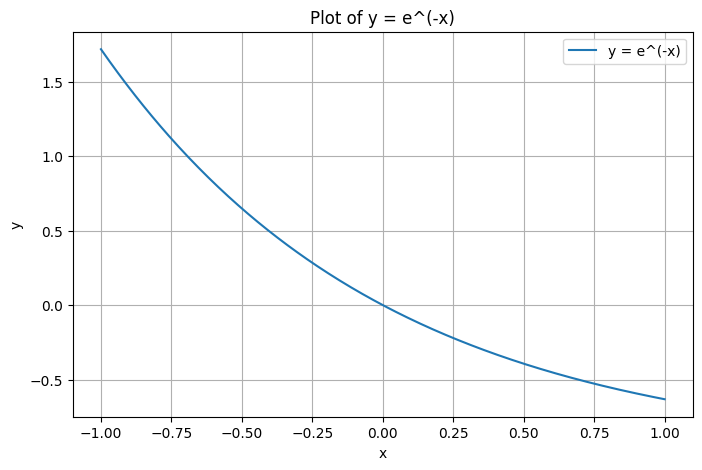

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数 e^(-x)
def exp_function(x):
    return np.exp(-x)-1

# 生成x值，范围从0到10，足够多的点以确保平滑的曲线
x = np.linspace(-1, 1, 400)
y = exp_function(x)

# 创建图形
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='y = e^(-x)')

# 添加标题和标签
plt.title("Plot of y = e^(-x)")
plt.xlabel("x")
plt.ylabel("y")

# 显示图例
plt.legend()

# 添加网格线，提高可读性
plt.grid(True)

# 显示图形
plt.show()


C:\Users\hongchuanyang\AppData\Local\Temp\ipykernel_25712\2684964839.py:6: RuntimeWarning: divide by zero encountered in log
  return -np.log(x+1)


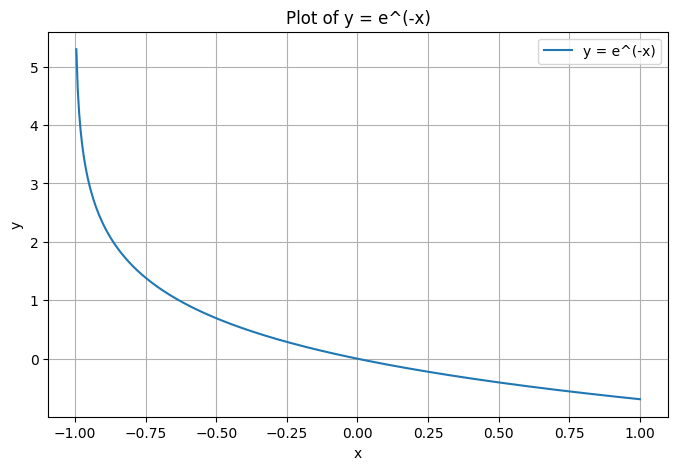

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数 e^(-x)
def exp_function(x):
    return -np.log(x+1)
np.log

# 生成x值，范围从0到10，足够多的点以确保平滑的曲线
x = np.linspace(-1, 1, 400)
y = exp_function(x)

# 创建图形
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='y = e^(-x)')

# 添加标题和标签
plt.title("Plot of y = e^(-x)")
plt.xlabel("x")
plt.ylabel("y")

# 显示图例
plt.legend()

# 添加网格线，提高可读性
plt.grid(True)

# 显示图形
plt.show()


In [13]:
def custom_loss(score_pre, score_true):
    x = score_pre - score_true
    loss = np.maximum(0, -np.log(x + 1))
    return loss

0.0